## Final Project Submission

Please fill out:
* Student name: Kosta Tzioumis
* Student pace: part time
* Scheduled project review date/time: 02/06/2019
* Instructor name: Eli Thomas
* Blog post URL: ...yeah I'll get right on that



<img src='osemn.jpg'>

For this project I will be following the OSEMN methodology above:

Obtain: data is provided in the form of 'kc_house_data.csv'. This is loaded directly into a Pandas DataFrame

Scrub: data is checked for missing values and placeholders and outliers

Explore: Exploratory Data Analysis is performed through summary statistics and visually through graphs generated directly from data

Model: Linear Regression model is generated using Ordinary Least Squares method on training split of data set, checked against the test split for variation in Mean Squared Error and verified by 10 fold cross validation 

iNterpret: Conclusions are drawn from the visualisations and from model

Import necessary modules to begin:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

load dataset into pandas dataframe to begin analysis! 
View first 5 rows to get a feel for data and data types

In [2]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Inspect the the data frame info, looking for overall size, variables with significant missing data, variable datatypes are what is expected

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


id is an unnecessary feature as the data is already indexed in the data frame. This column can be dropped.

In [4]:
df.drop(columns=['id'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


# Check for missing data

In [5]:
#number of missing values for each feature
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'waterfront' and 'yr_renovated' both have many missing values, missing values also present in 'view' but very few.

Tackle these one at a time starting with waterfront.


In [6]:
df.waterfront.value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

Categorical feature representing whether or not the house is on the waterfront. Very few houses are 1.0. 
Waterfront locations appear to be quite rare, I don't think it is unreasonable to set the missing values to 0 and the data type changed to 'category'

In [7]:
df.waterfront.fillna(value=0,inplace=True)
df.waterfront=df.waterfront.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(1), float64(7), int64(10), object(2)
memory usage: 3.2+ MB


Now I'll investigate the missing vales on the 'view'

In [8]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Onto the next most missing data - 'yr_renovated'. This is a numerical feature representing a the year of renovation. Start by getting some basic statistics on the data

In [9]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

This would indicate alot of 0's in the data, these could also be considered missing data as the house cannot have been renovated in the year 0. 0 is a placeholder. Most likely indicating the house has not been renovated since building

In [10]:
df.yr_renovated.value_counts().head()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

Yep, 17 thousand 0s, by far the most common entry. For now I'm goign to set the missing data to 0 and consider how to deal with this feature later

In [11]:
df.yr_renovated.fillna(value=0.0,inplace=True)
df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

The feature describes the number of times a house has been viewed. There is a 0.0 value that represents the house has not been viewed while it may be the case that the missing data represents house that have not been viewed since there are relatively few pieces of missing data it would be safer to drop these rows than make assumptions that may bias our data set

In [12]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

NO MORE MISSING DATA!! (or is there?)
Most of the data is numerical but there were 2 object data types in the initial info description - date and sqft_basement
date is date string this makes sense (but we'll check it for nonsense anyway)
sqft_basement should be a numerical feature, why isnt it?

In [13]:
df.sqft_basement.describe()

count     21534
unique      302
top         0.0
freq      12798
Name: sqft_basement, dtype: object

In [14]:
df.sqft_basement.value_counts().head(5)

0.0      12798
?          452
600.0      216
500.0      209
700.0      207
Name: sqft_basement, dtype: int64

'?' appears to have been used as placeholder for missing data. There are also a lot of 0's in this data, presumably from houses without basements. From our column descriptions the sqft_basement is the difference between the sqft_living and sqft_above. SO I'm goign to take a look at these variale too to determine what to do with this missing data

In [15]:
df.sqft_living.describe()

count    21534.000000
mean      2079.827854
std        917.446520
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [16]:
df.sqft_above.describe()

count    21534.000000
mean      1788.557537
std        827.745641
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

No zeros , no negatives and absurd outliers in these features that would indicate placeholders for missing data
So I'm going to look at those entries that have a '?'

In [17]:
df[['sqft_living','sqft_above']].loc[df.sqft_basement=='?'].head(10)

,sqft_living,sqft_above
6,1715,1715
18,1200,1200
42,3595,3595
79,3450,3450
112,1540,1160
115,4380,2780
217,2250,2250
309,3320,2220
384,4800,3480
508,1540,820


So we can see from just these entries there are some cases where the sqft_basement = 0 and some where sqft_basement>0
Just one more check of the dataframe for errors, are there any entries where the sqft_above>sqft_living? This is impossible by our definitions of these features

In [18]:
df.loc[df.sqft_above>df.sqft_living]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


OK, good, no tardis houses. So where are these missing values?

In [19]:
df.loc[df.sqft_basement=='?'].index

Int64Index([    6,    18,    42,    79,   112,   115,   217,   309,   384,
              508,
            ...
            21236, 21248, 21356, 21357, 21365, 21442, 21447, 21473, 21519,
            21581],
           dtype='int64', length=452)

Found where they are, now I can replace them with the difference between the sqft_living and sqft_above

In [20]:
for i in df.loc[df['sqft_basement']=='?'].index:
    df['sqft_basement'][i]=df['sqft_living'][i]-df['sqft_above'][i]
    

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df.loc[df.sqft_basement=='?'].index

Int64Index([], dtype='int64')

No more ?s
so now this feature is all numerical and we can set its datatype to float64

In [22]:
df.sqft_basement=df.sqft_basement.astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null category
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: category(1), float64(8), int64(10), object(1)
memory usage: 3.9+ MB


OK our last remaining object datatype is for the date feature, date string data is going to be difficult ot include in our generalized model, as with the walmart data we may need to drop this column

# Lets continue our data exploration of the numerical data by looking at the summary statistics and feature histograms

In [24]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.233863,3.409724,7.657425,1788.557537,291.270317,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,0.650654,1.172643,827.745641,442.199825,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


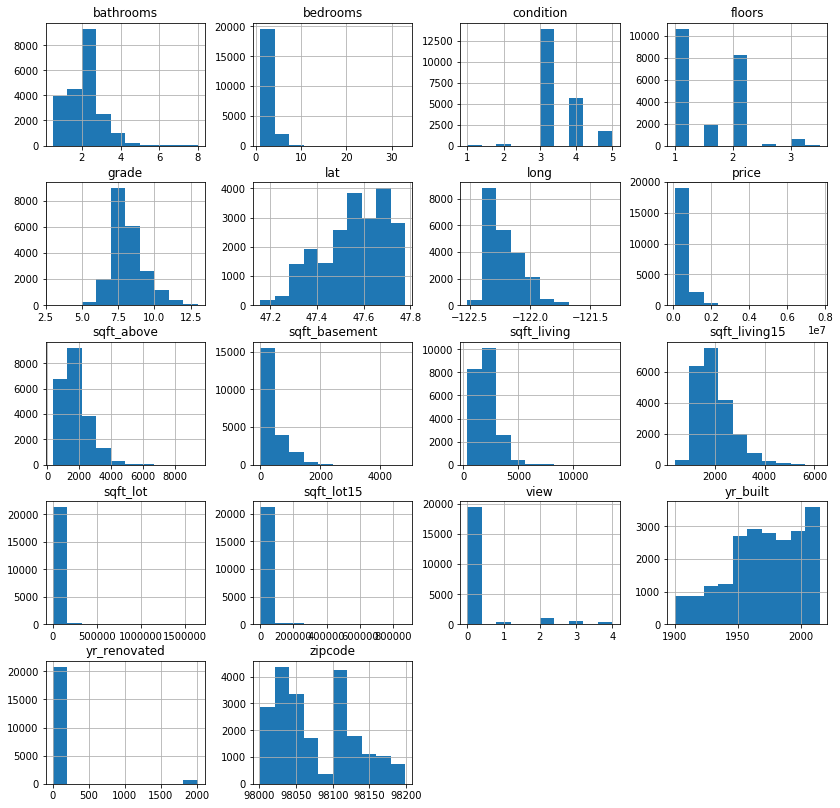

In [25]:
df.hist(figsize=(14,14))
plt.show()

Heavily skewed price data, bedrooms, bathroom, sqft_lot, sqft_living
from previous description bedrooms goes all the way up to 33 but is this an outlier?

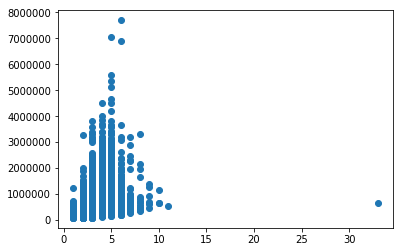

In [26]:
plt.scatter(df.bedrooms,df.price)

It is, Something weird going in with this entry thats too many bedrooms. Check out the whole entry

In [27]:
df.loc[df.bedrooms==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


33 bedrooms and 1.75 bathrooms. I wouldn't want to live there. And all on a 1620 sqft living area? Those bedrooms are less than 50 sqft each. Is this a jail? Dropped

In [28]:
df.drop(labels=15856, axis=0, inplace=True)

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,5.400530e+05,3.371662,2.115729,2079.849208,1.509102e+04,1.494149,0.233874,3.409650,7.657456,1788.592300,291.256908,1971.003390,68.869921,98077.938188,47.560174,-122.213943,1986.330423,12751.453397
std,3.660674e+05,0.904162,0.768616,917.462472,4.138112e+04,0.539808,0.765702,0.650579,1.172661,827.749142,442.205716,29.376271,364.322710,53.507609,0.138529,0.140736,685.122310,27256.060980
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


OK, histograms again, bedrooms should look a bit nicer and more normal

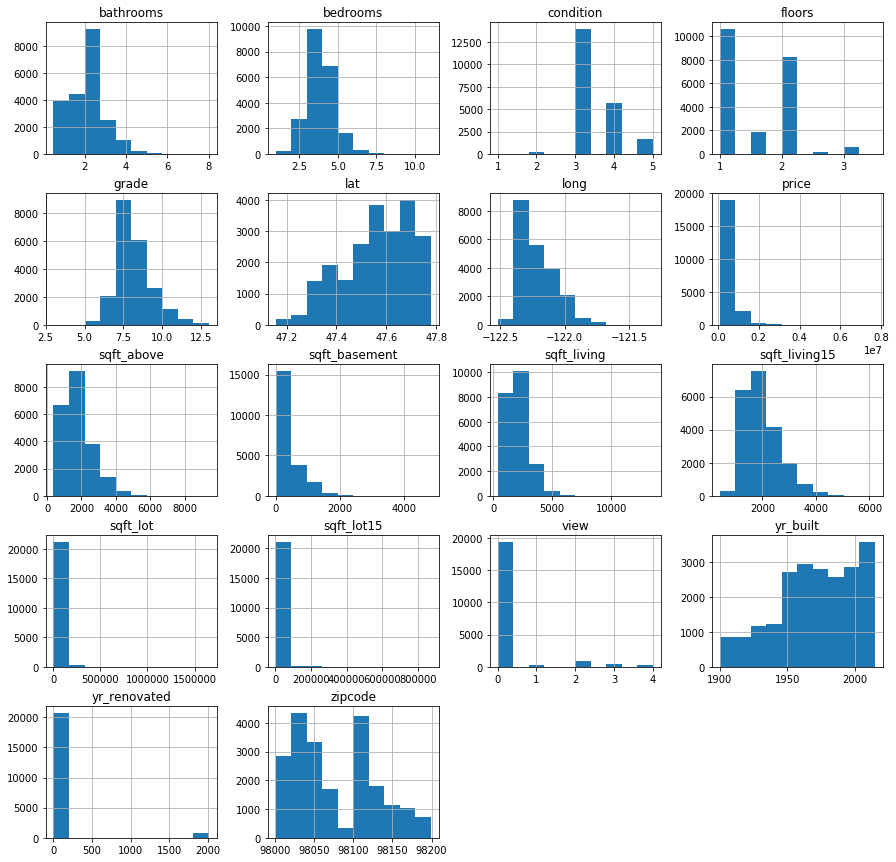

In [30]:
df.hist(figsize=(15,15))
plt.show()

form the price histogram it looks like there are a few high price outliers worth looking at in more detail

In [31]:
a=list(df.price)
#sorted list of al house prices in descending order
b=sorted(a,reverse=True)
#print the top 10
print('Top 10 highest house prices')
b[0:10]

Top 10 highest house prices


[7700000.0,
 7060000.0,
 6890000.0,
 5570000.0,
 5350000.0,
 5110000.0,
 4670000.0,
 4500000.0,
 4490000.0,
 4210000.0]

Top 3 are noticabely higher, worth a closer look at all the features for these entries

In [32]:
df.loc[df.price==7700000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


In [33]:
df.loc[df.price==7060000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.65,-122.214,3930,25449


In [34]:
df.loc[df.price==6890000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9245,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.24,4540,42730


big houses on big lots plenty of bedroom plenty of bathrooms high grade indicates high quality fixtures and workmanship, yeah these are just expensive houses...

Remember yr_renovated? that histogram looks highly skewed because we had all those zeros. what does the rest of the data look like?

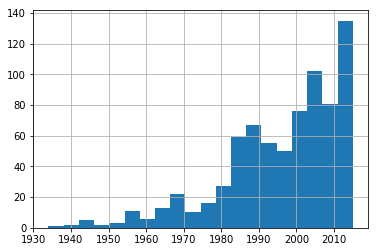

In [35]:
df.yr_renovated.loc[df.yr_renovated>0].hist(bins=20)


C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


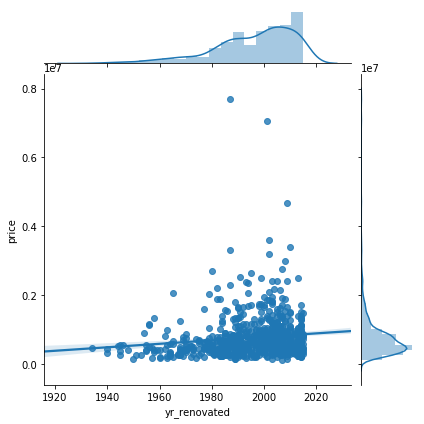

In [36]:
renovated=df.loc[df.yr_renovated>0]
sns.jointplot(renovated.yr_renovated,renovated.price,kind='reg')
plt.show()

I could probably try binning this? Not renovated, renovated before 2000 and renovated after 2000

In [37]:
#set all years later than 2000 equal to the value 2
df.yr_renovated.loc[df['yr_renovated']>=2000]=2
#now set all values later than 3 = 1
df.yr_renovated.loc[df['yr_renovated']>3]=1
df.yr_renovated=df.yr_renovated.astype('category')
df.yr_renovated.value_counts()
#data is binned into categories 0,1,2
#set to string

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0.0    20790
2.0      379
1.0      364
Name: yr_renovated, dtype: int64

renovated year groups are approximately equal size

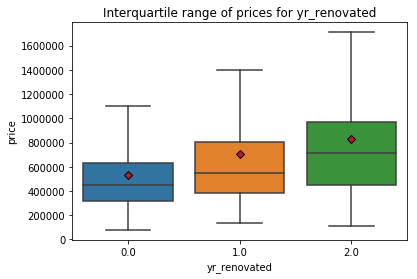

,yr_renovated,mean_price,median_price
0,unrenovated,531910.0,449000.0
1,renovated before 2000,701514.0,550000.0
2,renovated after 2000,831667.0,710000.0


In [38]:
sns.boxplot(df.yr_renovated,df.price, showfliers=False, showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'))
plt.title('Interquartile range of prices for yr_renovated')
plt.show()

#display price means and medians in a dtaframe

ren_label=['unrenovated','renovated before 2000','renovated after 2000']
ren_mean=[]
ren_median=[]
for i in [0,1,2]:
    ren_mean.append(round(df.price.loc[df.yr_renovated==i].mean()))
    ren_median.append(round(df.price.loc[df.yr_renovated==i].median()))
reno=pd.DataFrame([])
reno['yr_renovated']=ren_label
reno['mean_price']=ren_mean
reno['median_price']=ren_median
reno
#print('unrenovated mean price:',round(df.price.loc[df.yr_renovated==0].mean()),'median price:',round(df.price.loc[df.yr_renovated==0].median()),'\nrenovated BEFORE 2000 mean price:',round(df.price.loc[df.yr_renovated==1].mean()),'median price:',round(df.price.loc[df.yr_renovated==1].median()),'\nrenovated AFTER 2000 mean price:',round(df.price.loc[df.yr_renovated==2].mean()),'median price:',round(df.price.loc[df.yr_renovated==2].median()))

Conclusions:
Increases in house value due to renovation to the order of hundreds of thousands of dollars. Renovation can be a very worthwhile investment for raising house prices

# What to renovate?

What are the goals of the renovation? Improving grade or improving overall condition?

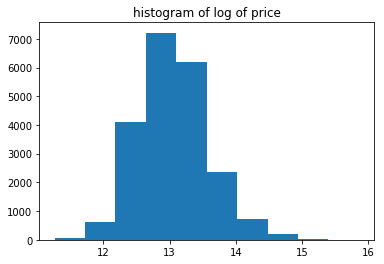

In [40]:
price_log=np.log(df.price)
plt.hist(price_log)
plt.title('histogram of log of price')
plt.show()

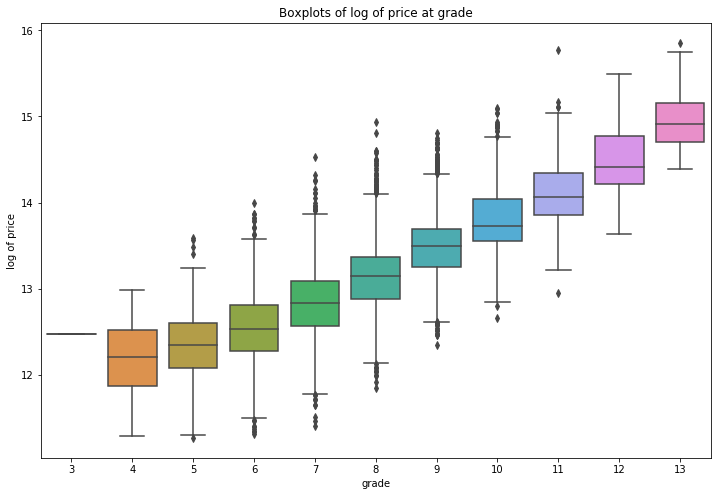

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(df.grade,price_log)
plt.ylabel('log of price')
plt.title('Boxplots of log of price at grade')
plt.show()

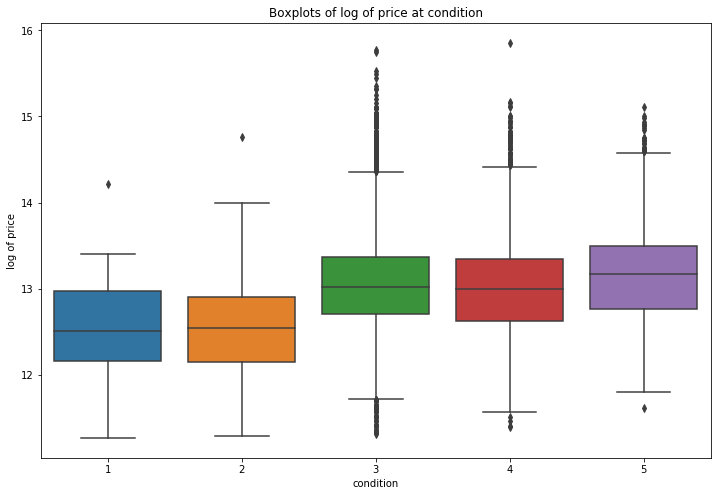

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(df.condition,price_log)
plt.ylabel('log of price')
plt.title('Boxplots of log of price at condition')
plt.show()

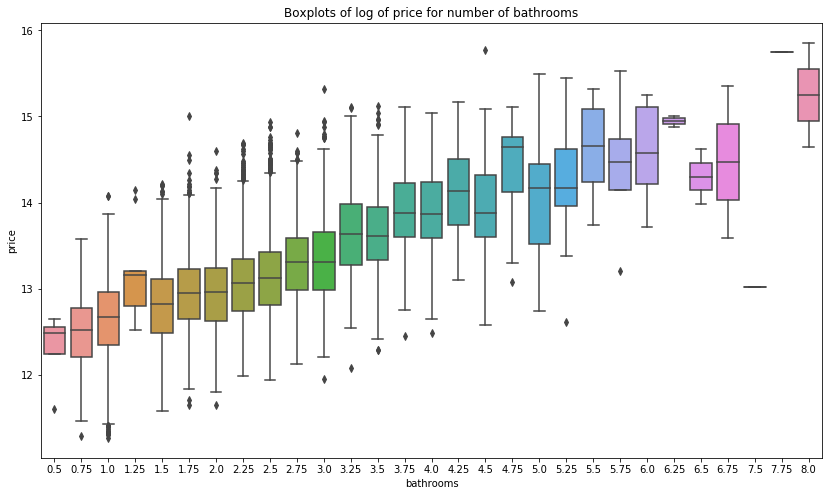

In [43]:
plt.figure(figsize=(14,8))
sns.boxplot(df.bathrooms,price_log)
plt.title('Boxplots of log of price for number of bathrooms')
plt.show()

Condition of the house matters when it falls below a rank of 3. Efforts to improve the overall condition of the house are worthwhile to raise the condition to 3 but moving beyond a 3 provides little or no added benefit to sale price.
Grade, however, appears to affect sale price at a continuous rate.
Renovating to improve fixtures and architecural detail will continue to improve sale price.
Adding a bathroom is contentious, between 1.5 and 4.25 bathrooms there appears to be a direct positive correlation but past 4.25 bathrooms the effects are less predictable

Conclusion: if the house's condition is below a 3 renovate to improve to a 3 past that the renovation budget should focus on improving the house's grade

# Where are all these houses?

In [44]:
len(df.zipcode.unique())

70

zipcode is currently considered a numerical feature but the is no numerical relationship between zipcodes. These could be reclassified as categories and set to strings to be one-hot encoded later, this will result in 70 extra columns which may result in excessive multidimensionality

Lets have a look at where all these zipcodes are on a map by plotting them on scatter plot with latitude and longitude

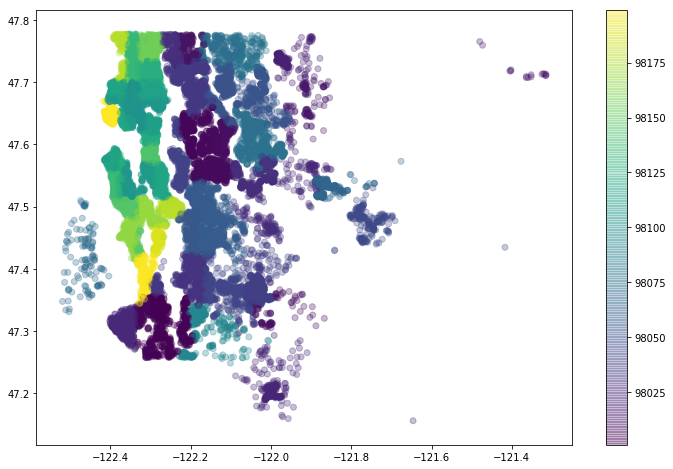

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(df.long,df.lat,alpha=0.3,c=df.zipcode)
plt.colorbar()
plt.show()

There are 70 individual zipcodes and the color map is a bit all over the placebut to identify if there is clustering lets find the highest price houses and the lowest price houses and show them on our map/scatter plot

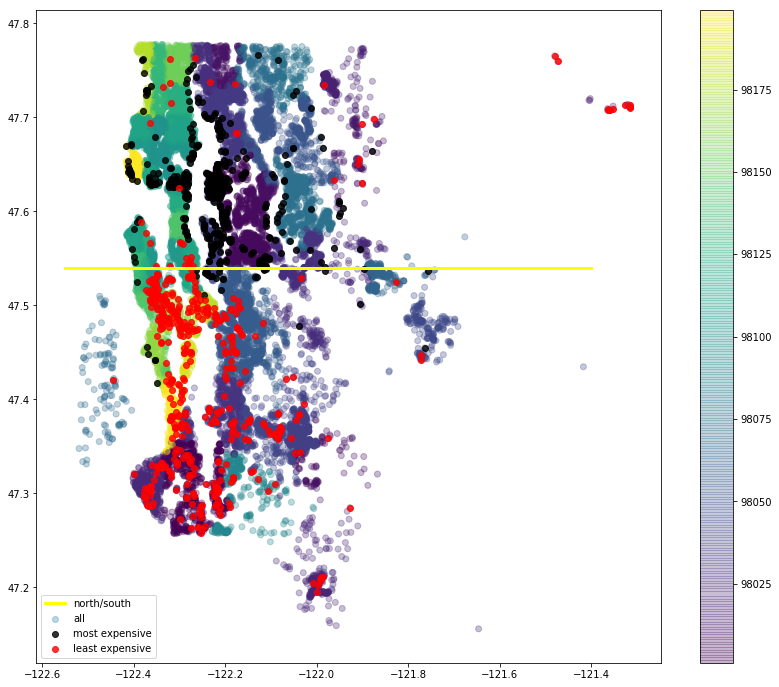

In [46]:
plt.figure(figsize=(14,12))
#identify the most 500 most expensive 
top_500=df.sort_values(by='price').tail(500)
#identify the 500 least expensive
bottom_500=df.sort_values(by='price').head(500)
#scatter plot of all the houses and replotting of top and bottom 500s in black and red respectively
plt.scatter(df.long,df.lat,label='all',alpha=0.3, c=df.zipcode)
plt.colorbar()
plt.scatter(top_500.long,top_500.lat,color='black',label='most expensive',alpha=0.8)
plt.scatter(bottom_500.long,bottom_500.lat,color='red',label='least expensive',alpha=0.8)
plt.plot([-122.55,-121.4],[47.54,47.54], linewidth=3,color='yellow', label='north/south')
plt.legend()
plt.show()

A pretty identifiable north/south style divide long the line latitude=47.54
This can be used for our regression model by binning the data by latitude into 'north' and 'south' categories in a feature called 'north'. Expensive (north) will be designated True 

In [47]:
#create column called 'north' with boolean assignment based on latitude for data entry
df.north=df.lat>47.54
df.north.describe()


C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


count     21533
unique        2
top        True
freq      12898
Name: lat, dtype: object

In [48]:
north_desc=pd.DataFrame([round(df.loc[df.north==1].price.describe()),round(df.loc[df.north==0].price.describe())])
north_desc['north']=['1','0']
north_desc

,count,mean,std,min,25%,50%,75%,max,north
price,12898.0,657881.0,402250.0,80000.0,430000.0,558000.0,751000.0,7700000.0,1
price,8635.0,364054.0,201932.0,78000.0,250000.0,315000.0,416500.0,3400000.0,0


As expected the 'north' split give very distinct numerical descriptions, the mean and median of the more expensive north=1 set are almost double that of the inexpensive north. Although these data sets do overlap, the 75th percentile value of south is below the 25th percentile of the north

For our regression model 'north' can be used to classify by location!

In [49]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Show scatter plots related to price


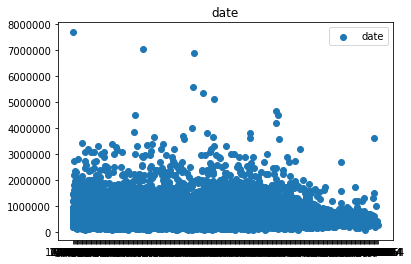

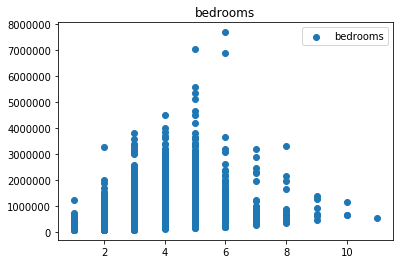

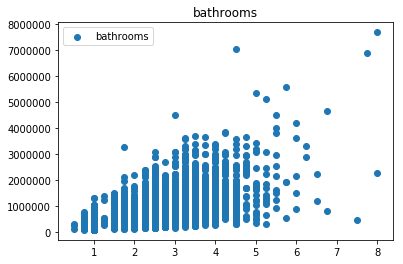

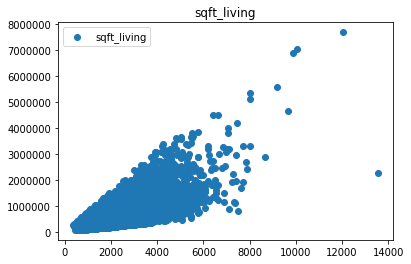

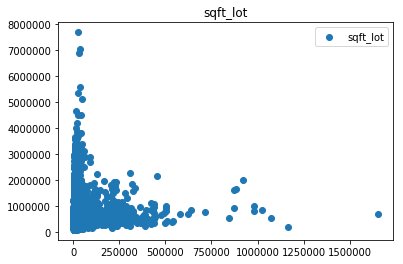

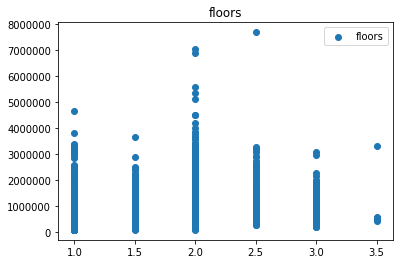

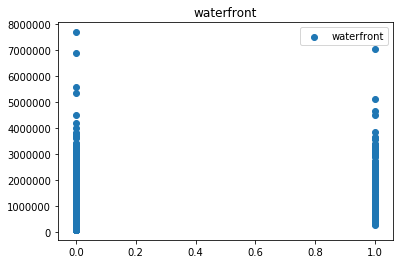

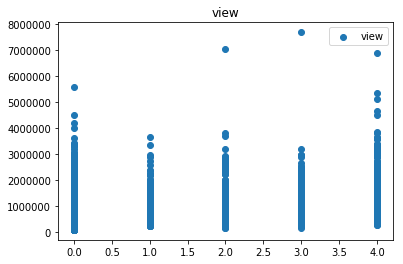

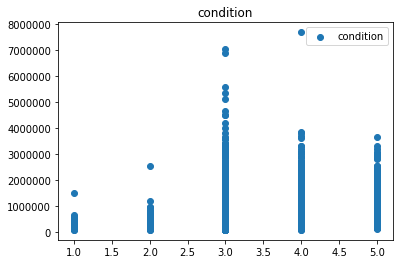

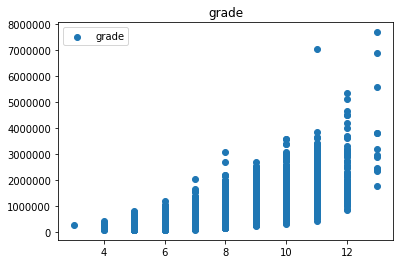

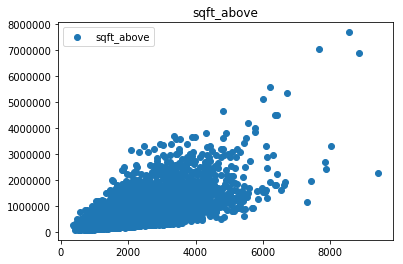

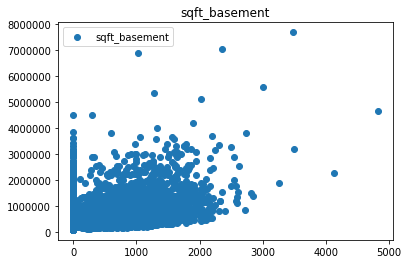

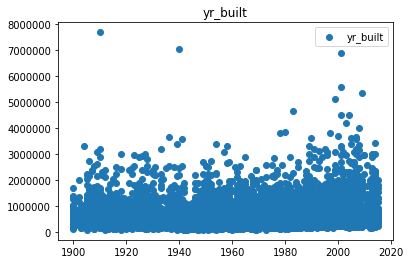

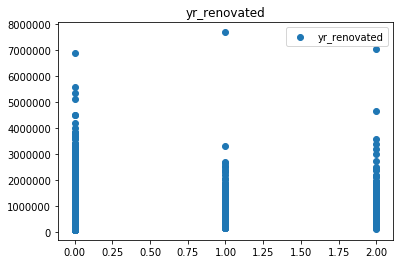

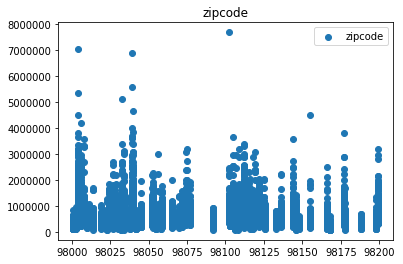

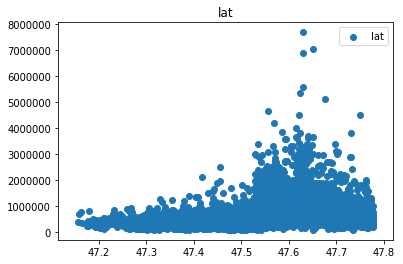

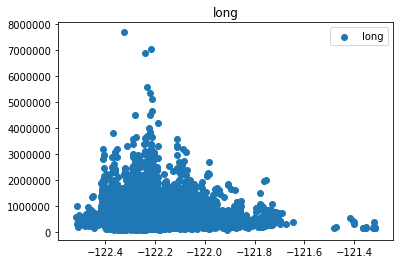

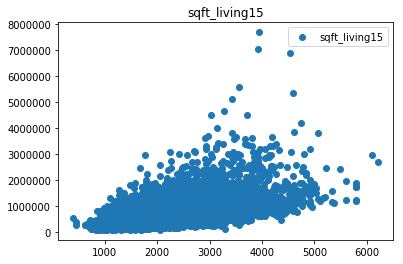

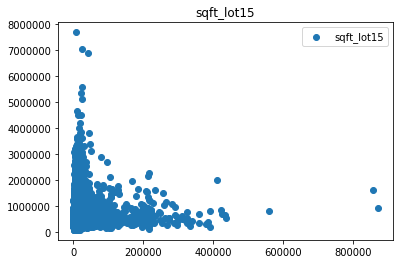

In [50]:
for col in df.columns:
    if col=='price':
        pass
    else:
        plt.scatter(df[col],df.price, label =col)
        plt.title(col)
        plt.legend()
        plt.show()

prices are very skewed toward the lower end taking the log of price to make feature more normal

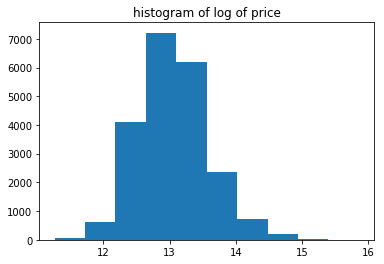

In [51]:
price_log=np.log(df.price)
plt.hist(price_log)
plt.title('histogram of log of price')
plt.show()

cool, very normal. Modelling presumes normality, log of price will be used later


In [52]:
price_log.describe()

count    21533.000000
mean        13.048025
std          0.526314
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

Scatter plots again with log_price

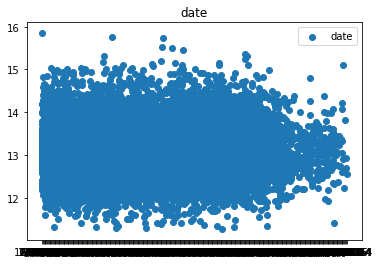

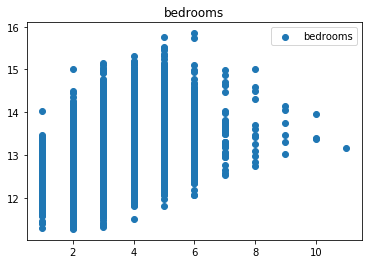

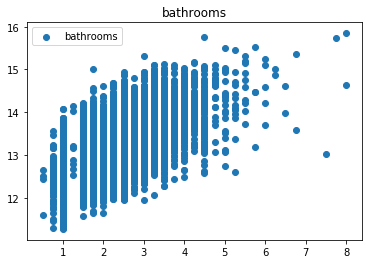

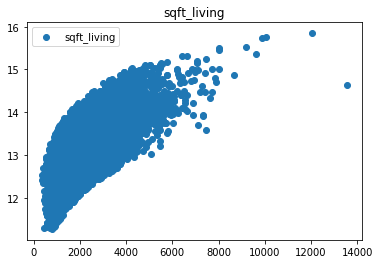

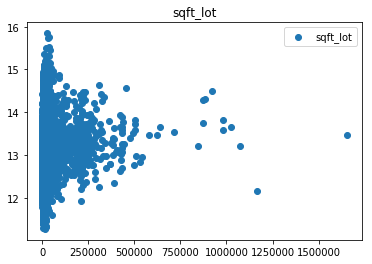

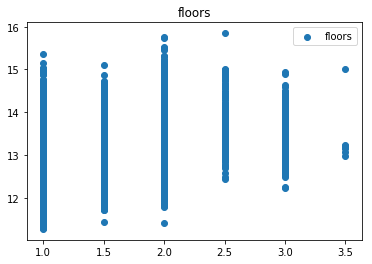

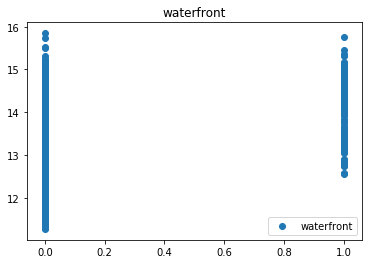

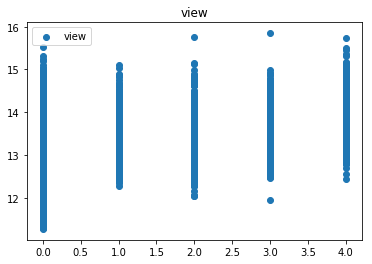

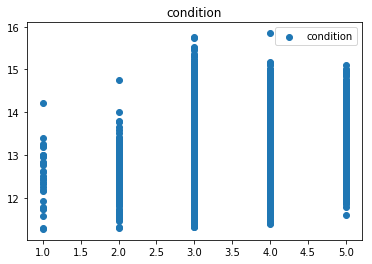

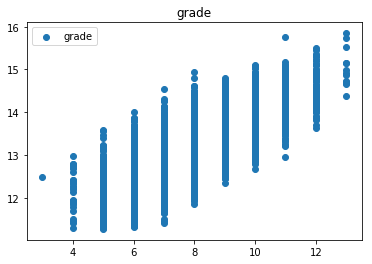

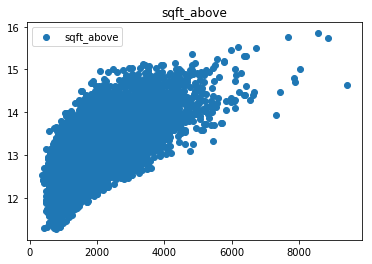

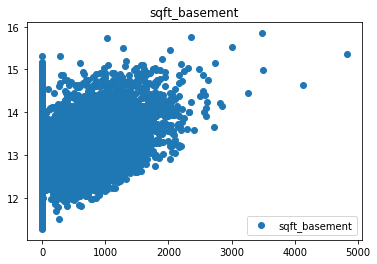

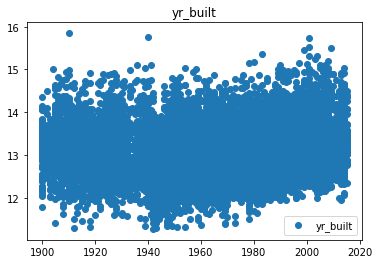

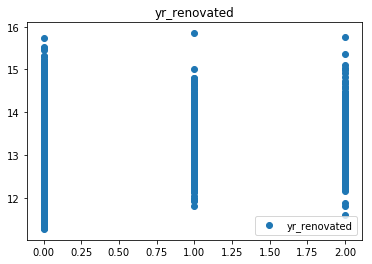

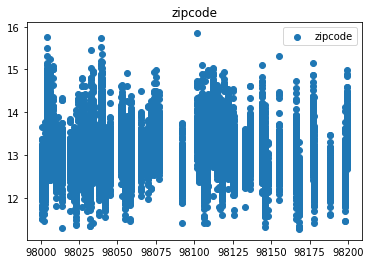

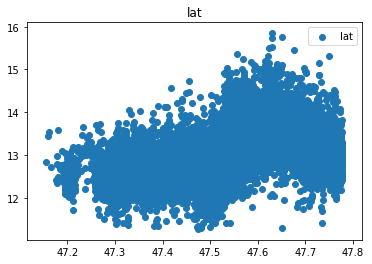

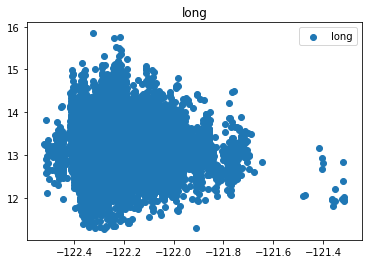

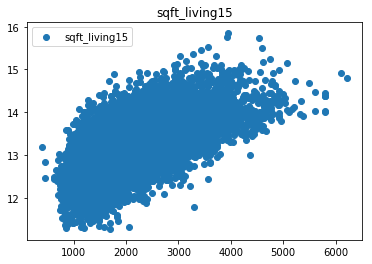

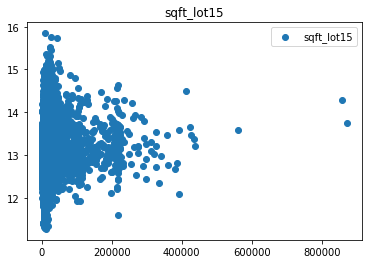

In [53]:
for col in df.columns:
    if col=='price':
        pass
    else:
        plt.scatter(df[col],price_log, label =col)
        plt.title(col)
        plt.legend()
        plt.show()

some more of these look like they could be log transformed or normalized, certainly the all the sqft features
try taking logs first

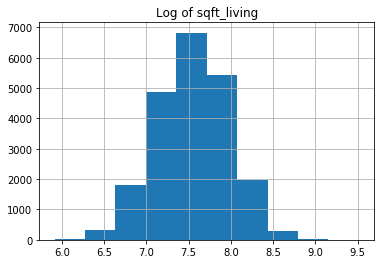

In [54]:
log_sqft_living=np.log(df.sqft_living)
norm_sqft_living=(df.sqft_living-df.sqft_living.mean())/df.sqft_living.std()
log_sqft_living.hist()
plt.title('Log of sqft_living')
plt.show()


much better, perform log transformations on sqft features

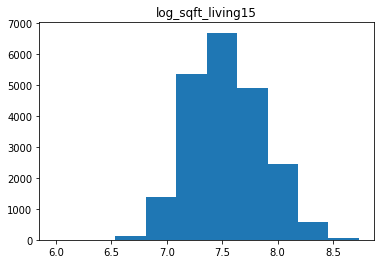

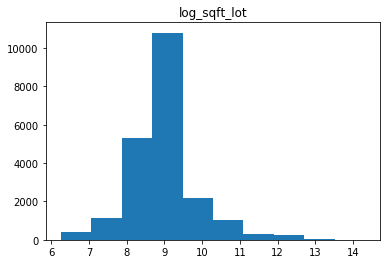

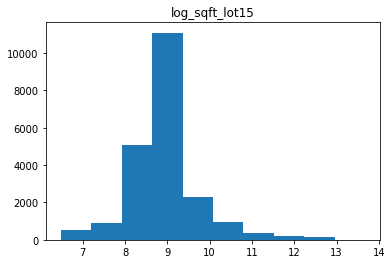

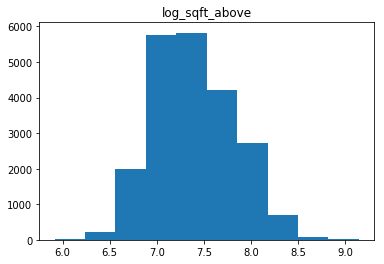

In [55]:
log_sqft_living15=np.log(df.sqft_living15)
log_sqft_lot=np.log(df.sqft_lot)
log_sqft_lot15=np.log(df.sqft_lot15)
log_sqft_above=np.log(df.sqft_above)
plt.hist(log_sqft_living15)
plt.title('log_sqft_living15')
plt.show()
plt.hist(log_sqft_lot)
plt.title('log_sqft_lot')
plt.show()
plt.hist(log_sqft_lot15)
plt.title('log_sqft_lot15')
plt.show()
plt.hist(log_sqft_above)
plt.title('log_sqft_above')
plt.show()

'sqft_basement' contains a lot of zero values. log transformation will not work here (log(0) approaches negative infinty)

Do these log transformations help bring a trend to light?

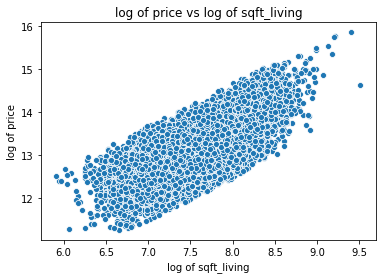

In [56]:
sns.scatterplot(log_sqft_living,price_log)
plt.title('Linear relationship between log of sqft_living and log of price')
plt.ylabel('log of price')
plt.xlabel('log of sqft_living')
plt.title('log of price vs log of sqft_living')
plt.show()

Yes! Definite linear relationship between two normal distributions for log of price and log of sqft_living

# Keeping up with the Joneses


We can't help but compare ourselves to others, especially those nearest to us. This dataset doesn't just provide data about the house itself it also provides interesting information about the houses nearby.
I would expect a house to gain value by being bigger than its neighbors, but does the data show this to be true?
Taking the difference between sqft_living and sqft_living15 determines whether the house in question is bigger or smaller than those around it

In [57]:
#create 'jones' feature
jones=pd.Series(np.array(df.sqft_living)-np.array(df.sqft_living15))
jones.describe()

count    21533.000000
mean        93.518785
std        600.388766
min      -2310.000000
25%       -220.000000
50%          0.000000
75%        310.000000
max       8690.000000
dtype: float64

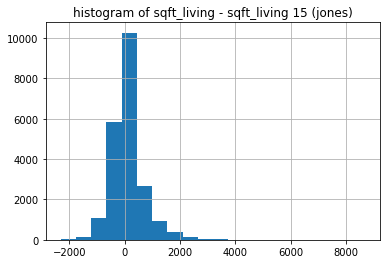

In [58]:
#explore the 'jones' feature with a  histogram
jones.hist(bins=20)
plt.title('histogram of sqft_living - sqft_living 15 (jones)')
plt.show()

left skew but appears normal and peaks around zero, some outliers drag out the right side of the histogram

The log of sqft_living and log of price had a very nice linear relationship with varieance within a broad range of values, by adding color to the scatter plot we can visualize where the jones feature is positive or negative within this relationship

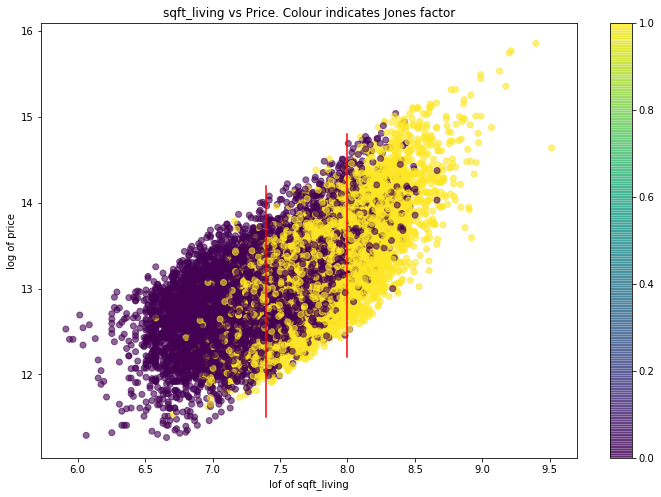

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(log_sqft_living,price_log, alpha=0.6, c=jones>0)
#red bars indicate 3 sections, jones mostly negative, jones negaitve and positive, jones mostly positive
plt.plot([7.4,7.4],[11.5,14.2], color='red')
plt.plot([8,8],[12.2,14.8], color='red')
plt.title('sqft_living vs Price. Colour indicates Jones factor')
plt.ylabel('log of price')
plt.xlabel('lof of sqft_living')
plt.colorbar()
plt.show()


The data above paints an unexpected picture. 

Amongst the smallest houses, the houses are almost exclusively smaller than their neighbors and amongst the biggest houses the the houses are almost exclusively bigger than their neighbors. this gives little bases for comparison of similar houses with different neighbor house sizes (varying sqft_living15 where sqft_living is constant).

In the central segment,however, we see a real mix of houses being bigger and smaller than their neighbours for that house size. Surprisingly, what we see are bands at the top and bottom of the price range where the cheaper houses in that size range tend to be bigger than their neighbors and the more expensive house in that size range tend to be smaller than their neighbors! The opposite of my initial assumption!

# Checking for covariance

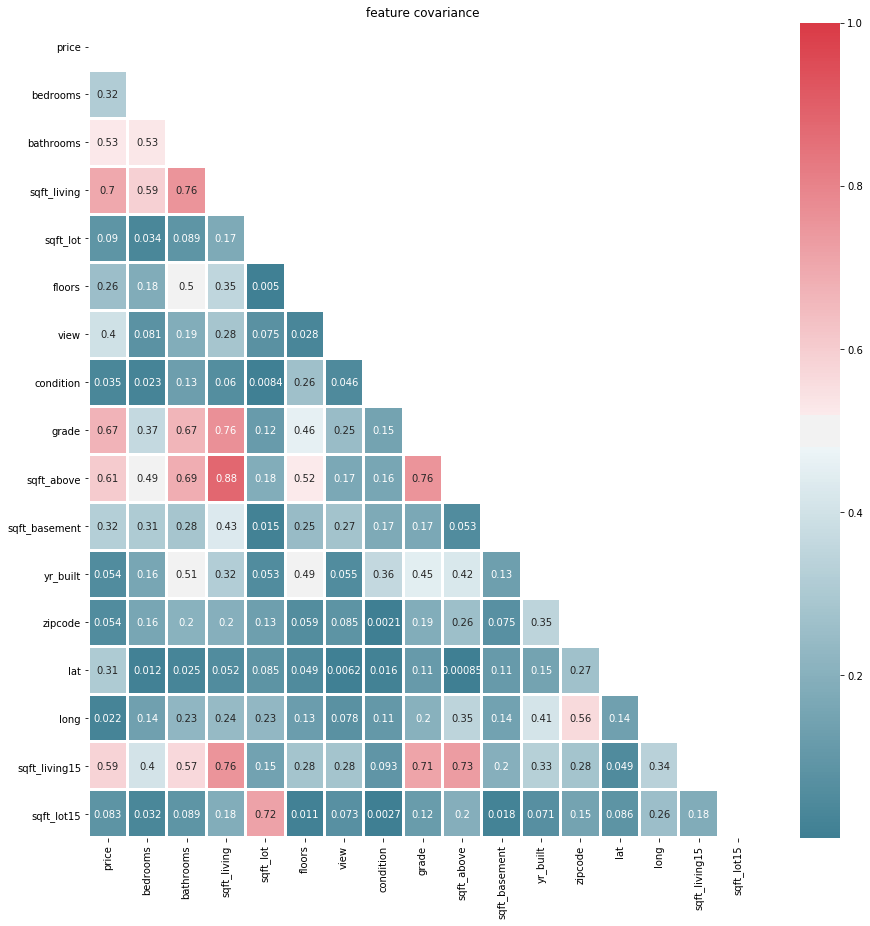

In [60]:
corr=df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10, as_cmap=True)
plt.figure(figsize=(15,15))
sns.heatmap(np.abs(corr),linewidths=2,mask=mask,cmap=cmap,annot=True)
plt.title('feature covariance')
plt.show()

Taking feature with a covariance with price freat than 0.5 gives us 5 linear features. This a good place to start building a model

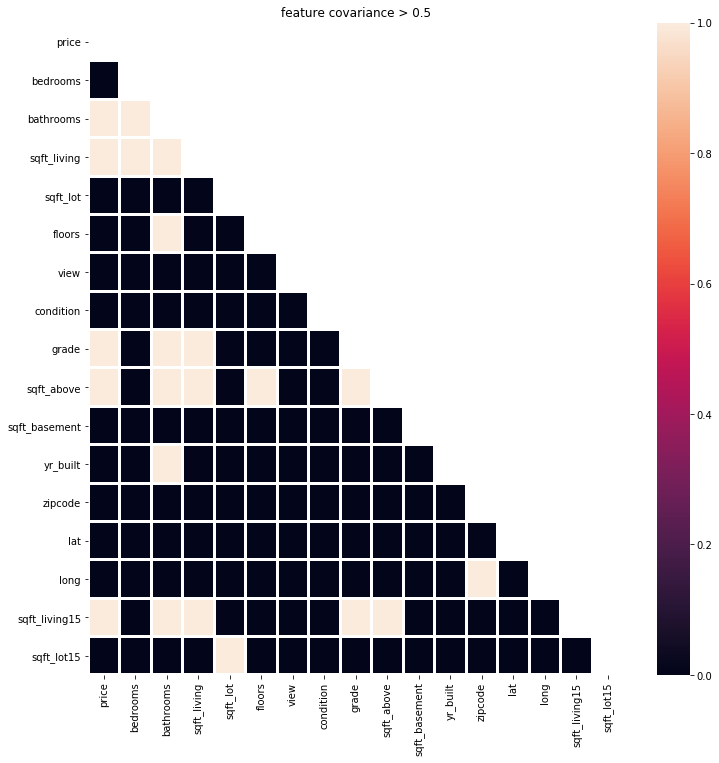

In [61]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(abs(corr)>.5,mask=mask,linewidths=2)
plt.title('feature covariance > 0.5')
plt.show()

The above heatmap makes them really stand out, the 5 linear features are 'bathrooms', 'sqft_living','grade', 'sqft_above','sqft_living15', we also want to include our categorical features from earlier, 'yr_renovated' and 'north'
Modelling assumes normality of features, earlier we had created log transformations on 'price', 'sqft_living', 'sqft_above' and 'sqft_living15', lets bring those transformed versions into our features dataset and perform min-max scaling to have all features normal and between -1 and 1

In [67]:
df_modelling=pd.DataFrame([])
df_modelling['price']=price_log
df_modelling['bathrooms']=(df.bathrooms-df.bathrooms.min())/(df.bathrooms.max()-df.bathrooms.min())
df_modelling['grade']=(df.grade-df.grade.min())/(df.grade.max()-df.grade.min())
df_modelling['sqft_living']=(log_sqft_living-log_sqft_living.min())/(log_sqft_living.max()-log_sqft_living.min())
df_modelling['sqft_above']=(log_sqft_above-log_sqft_above.min())/(log_sqft_above.max()-log_sqft_above.min())
df_modelling['sqft_living15']=(log_sqft_living15-log_sqft_living15.min())/(log_sqft_living15.max()-log_sqft_living15.min())
df_modelling['yr_renovated']=df.yr_renovated
df_modelling['north']=df.north.astype('int') #set north category to integar rather than Boolean to use in model
df_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21533 entries, 0 to 21596
Data columns (total 8 columns):
price            21533 non-null float64
bathrooms        21533 non-null float64
grade            21533 non-null float64
sqft_living      21533 non-null float64
sqft_above       21533 non-null float64
sqft_living15    21533 non-null float64
yr_renovated     21533 non-null category
north            21533 non-null int32
dtypes: category(1), float64(6), int32(1)
memory usage: 1.3 MB


Visually inspect histograms to ensure normality and scaling went OK

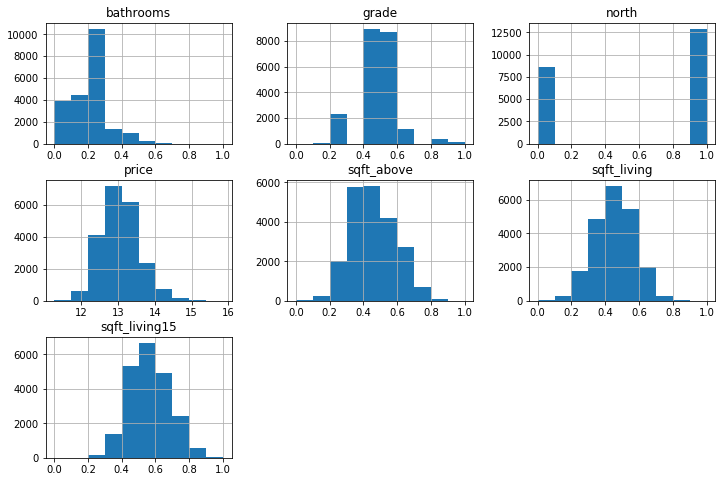

In [68]:
df_modelling.hist(figsize=(12,8))
plt.show()

one hot encoding for yr_renovated category

In [69]:
df_modelling['yr_renovated_0']=0
df_modelling['yr_renovated_1']=0
df_modelling['yr_renovated_2']=0
df_modelling['yr_renovated_0'].loc[df_modelling['yr_renovated']==0]=1
df_modelling['yr_renovated_1'].loc[df_modelling['yr_renovated']==1]=1
df_modelling['yr_renovated_2'].loc[df_modelling['yr_renovated']==2]=1
df_modelling.drop(columns=['yr_renovated'],inplace=True)

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Inspect the dataframe head for the sake of inspecting the dataframe head

In [70]:
df_modelling.head()

,price,bathrooms,grade,sqft_living,sqft_above,sqft_living15,north,yr_renovated_0,yr_renovated_1,yr_renovated_2
0,12.309982,0.066667,0.4,0.322166,0.358392,0.441342,0,1,0,0
1,13.195614,0.233333,0.4,0.538392,0.546652,0.525882,1,0,1,0
2,12.100712,0.066667,0.3,0.203585,0.226478,0.699256,1,1,0,0
3,13.311329,0.333333,0.4,0.463123,0.322322,0.446739,0,1,0,0
4,13.142166,0.200000,0.5,0.420302,0.467563,0.548854,1,1,0,0


she's a beaut alright now we're ready to build a model

# Model Building

To begin building our linear regression model we must first split our data into train and test data sets using sci-kit-learn


In [72]:
#ordinary least squares modelling
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [73]:

from sklearn.model_selection import train_test_split
#function to split our data into train and test sets
X=df_modelling.drop(columns='price')
y=df_modelling['price']
#add a constant
X = sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [74]:
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     5554.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:48:31   Log-Likelihood:                -1788.0
No. Observations:               16149   AIC:                             3594.
Df Residuals:                   16140   BIC:                             3663.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.4983      0.010    849.123      0.000       8.479       8.518
bathrooms         -0.0261      0.033     -0.791      0.429      -0.091       0.039
grade              1.3455      0.031     43.553      0.000       1.285       1.406
sqft_living        1.6073      0.043     37.338      0.000       1.523       1.692
sqft_above        -0.2013      0.035     -5.817      0.000      -0.269      -0.133
sqft_living15      0.5583      0.028     19.619      0.000       0.503       0.614
north              0.4516      0.005     99.757      0.000       0.443       0.460
yr_renovated_0     2.6987      0.007    409.715      0.000       2.686       2.712
yr_renovated_1     2.8754      0.013    215.021      0.000       2.849       2.902
yr_renovated_2     2.9242      0.013    224.007      0.000       2.899       2.950
==============================================================================
Omnibus:                      862.131   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1237.589
Skew:                           0.485   Prob(JB):                    1.82e-269
Kurtosis:                       3.947   Cond. No.                     2.52e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.53e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

drop bathrooms from features list as p value is above 0.05 and one categorical column from yr_renovated

In [75]:
X_train2=X_train.drop(columns=['bathrooms','yr_renovated_2'])
X_test2=X_test.drop(columns=['bathrooms','yr_renovated_2'])

In [76]:
model2=sm.OLS(y_train,X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     6347.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:48:32   Log-Likelihood:                -1788.4
No. Observations:               16149   AIC:                             3593.
Df Residuals:                   16141   BIC:                             3654.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.4245      0.019    593.348      0.000      11.387      11.462
grade              1.3405      0.030     44.318      0.000       1.281       1.400
sqft_living        1.5940      0.040     40.239      0.000       1.516       1.672
sqft_above        -0.2029      0.035     -5.871      0.000      -0.271      -0.135
sqft_living15      0.5600      0.028     19.729      0.000       0.504       0.616
north              0.4516      0.005     99.765      0.000       0.443       0.460
yr_renovated_0    -0.2249      0.016    -13.875      0.000      -0.257      -0.193
yr_renovated_1    -0.0480      0.023     -2.077      0.038      -0.093      -0.003
==============================================================================
Omnibus:                      862.700   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1236.334
Skew:                           0.486   Prob(JB):                    3.42e-269
Kurtosis:                       3.944   Cond. No.                         40.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
model2.pvalues

const             0.000000e+00
grade             0.000000e+00
sqft_living       0.000000e+00
sqft_above        4.407576e-09
sqft_living15     1.243625e-85
north             0.000000e+00
yr_renovated_0    1.593956e-43
yr_renovated_1    3.780728e-02
dtype: float64

No change in R-squared value for model but all pvalues now 0 or near enough to it

In [78]:
y_hat_train2=model2.predict(X_train2)
y_hat_test2=model2.predict(X_test2)

In [80]:
from sklearn.metrics import mean_squared_error
train_mse2=mean_squared_error(y_train,y_hat_train2)
test_mse2=mean_squared_error(y_test,y_hat_test2)
print('train MSE:',train_mse2)
print('test MSE:', test_mse2)

train MSE: 0.07306580054143974
test MSE: 0.07608906483187174


Very little variation in train and test Mean Squared Error, model not over fitted and is as accurate on test data as it is on training data

So we have a model!
R-Squared is 0.733 meaning 73.3% of variation  of the response data and its mean using the features grade, sqft_living, sqft_above, sqft_living15, north and yr_renovated. The features used in the is model were selected by EDA

Run model again using sklearn Linear Regression in order to run Cross Validation

In [81]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [82]:
linreg.fit(X_train2,y_train)
linreg.intercept_,linreg.coef_

(11.424495006080779,
 array([ 0.        ,  1.34051154,  1.59400734, -0.20288167,  0.55997407,
         0.45158638, -0.22493232, -0.04795096]))

intercept and coefficients are all the same as OLS model as they should be

In [83]:
from sklearn.model_selection import cross_val_score
#cross validation method
cv_10_test=cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')
cv_10_test

array([-0.07750059, -0.07712413, -0.0760075 , -0.07618568, -0.07070151,
       -0.07337055, -0.07442706, -0.07691479, -0.07601075, -0.0616301 ])

Some pretty consistent MSEs across the ten cross validation tests

# Conclusion

So we have a model!
R-Squared is <b>0.733</b> meaning 73.3% of variation  of the response data and its mean using the features grade, sqft_living, sqft_above, sqft_living15, North and yr_renovated. This model holds up to 10-fold cross validation and retains consistent MSE

# Recap

1. Data loaded into pandas dataframe
2. Data scrubbed for missing values
3. Removed outlier
4. Generated summary statistics and feature histograms
5. Convert yr_renovated to categorical category 
6. EDA to investigate grade, condition and bathrooms
7. EDA to investigate location effects zipcode, lat, long. determine lat 'north' classification feature
8. Take log of price to push to normal distribution
9. Take log of sqft_x features to push to normal where possible
10. Develop, investigate 'jones' feature
11. Check for covariance in heatmap and binary heatmap 
12. Take top 5 linear features using 0.5 corellation with price as cutoff and categorical features to develop regression model
13. min/max scaling on linear features to 
14. one-hot encoding of categorical feature yr_renovated
15. Train/test split
15. OLS regression model.
16. Drop bathrooms from model due to p-value > 0.05
17. Run OLS regression model again
18. Verify model against test data
19. 10 fold cross validation


# Future work

This model does not make use of the 'date' feature. Future work could involve Exploratory data analysis into wehther prices are trending up or down year over year or if the house prices tend to peak or valley during a particular tiem of year.

Deeper investigation into location data is merited. This report makes a north/south divide but future work could more deeply dive into zipcodes as a method of classification

Investigate internal house ratios. Covariance amongst internal house features such as sqft_living and bedrooms or bathrooms and sqft_above may yield interesting results and trends